In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Read the input file and check the data dimension

In [3]:
df=pd.read_csv("german_credit.csv")

In [4]:
df.head()
df.info()
df.dtypes

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

default                        int64
account_check_status          object
duration_in_month              int64
credit_history                object
purpose                       object
credit_amount                  int64
savings                       object
present_emp_since             object
installment_as_income_perc     int64
personal_status_sex           object
other_debtors                 object
present_res_since              int64
property                      object
age                            int64
other_installment_plans       object
housing                       object
credits_this_bank              int64
job                           object
people_under_maintenance       int64
telephone                     object
foreign_worker                object
dtype: object

In [5]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_a, df_b = train_test_split(df, test_size=0.50, random_state=0)

In [8]:
df_a.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 631 to 684
Data columns (total 21 columns):
default                       500 non-null int64
account_check_status          500 non-null object
duration_in_month             500 non-null int64
credit_history                500 non-null object
purpose                       500 non-null object
credit_amount                 500 non-null int64
savings                       500 non-null object
present_emp_since             500 non-null object
installment_as_income_perc    500 non-null int64
personal_status_sex           500 non-null object
other_debtors                 500 non-null object
present_res_since             500 non-null int64
property                      500 non-null object
age                           500 non-null int64
other_installment_plans       500 non-null object
housing                       500 non-null object
credits_this_bank             500 non-null int64
job                           500 non-null object


In [9]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [10]:
df_a_dum=pd.get_dummies(df_a)

In [11]:
# Print Shape of model data

In [12]:
df_a_dum.shape

(500, 62)

In [13]:
df_a.head()
df_a_dum.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
631,1,< 0 DM,18,all credits at this bank paid back duly,radio/television,1553,... < 100 DM,1 <= ... < 4 years,4,male : single,...,3,"if not A121/A122 : car or other, not in attrib...",44,bank,own,1,skilled employee / official,1,none,yes
185,0,no checking account,15,critical account/ other credits existing (not ...,domestic appliances,1360,... < 100 DM,1 <= ... < 4 years,4,male : single,...,2,if not A121 : building society savings agreeme...,31,none,own,2,skilled employee / official,1,none,yes
732,0,0 <= ... < 200 DM,8,existing credits paid back duly till now,domestic appliances,760,... < 100 DM,4 <= ... < 7 years,4,female : divorced/separated/married,...,2,real estate,44,none,own,1,unskilled - resident,1,none,yes
404,0,0 <= ... < 200 DM,18,delay in paying off in the past,car (new),2899,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,"if not A121/A122 : car or other, not in attrib...",43,none,own,1,skilled employee / official,2,none,yes
194,1,0 <= ... < 200 DM,45,existing credits paid back duly till now,domestic appliances,3031,100 <= ... < 500 DM,1 <= ... < 4 years,4,male : single,...,4,if not A121 : building society savings agreeme...,21,none,rent,1,skilled employee / official,1,none,yes


,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
631,1,18,1553,4,3,44,1,1,0,1,...,1,0,0,1,0,0,1,0,0,1
185,0,15,1360,4,2,31,2,1,0,0,...,1,0,0,1,0,0,1,0,0,1
732,0,8,760,4,2,44,1,1,1,0,...,1,0,0,0,0,1,1,0,0,1
404,0,18,2899,4,4,43,1,2,1,0,...,1,0,0,1,0,0,1,0,0,1
194,1,45,3031,4,4,21,1,1,1,0,...,0,1,0,1,0,0,1,0,0,1


In [14]:
df_a_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 631 to 684
Data columns (total 62 columns):
default                                                                       500 non-null int64
duration_in_month                                                             500 non-null int64
credit_amount                                                                 500 non-null int64
installment_as_income_perc                                                    500 non-null int64
present_res_since                                                             500 non-null int64
age                                                                           500 non-null int64
credits_this_bank                                                             500 non-null int64
people_under_maintenance                                                      500 non-null int64
account_check_status_0 <= ... < 200 DM                                        500 non-null uint8
account_check_status

### Check for highly correlated variables but don't required any treatment for this use case

In [15]:
df_a_dum.corr()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.196757,0.150186,0.065731,0.007988,-0.078169,0.005401,0.016450,0.081754,0.313346,...,-0.155688,0.144401,0.026744,-0.053846,-0.024683,0.052718,0.022039,-0.022039,-0.111359,0.111359
duration_in_month,0.196757,1.000000,0.615026,0.062245,0.050901,-0.111937,-0.005528,-0.027555,0.047325,0.006168,...,-0.082217,0.015097,0.101999,0.083521,-0.050103,-0.180103,-0.197120,0.197120,-0.173652,0.173652
credit_amount,0.150186,0.615026,1.000000,-0.277692,0.029636,-0.027383,-0.015795,-0.007862,0.108238,-0.063799,...,-0.137395,0.037808,0.281752,-0.052655,-0.064285,-0.172640,-0.321111,0.321111,-0.133553,0.133553
installment_as_income_perc,0.065731,0.062245,-0.277692,1.000000,0.107459,0.048377,0.039409,-0.070694,-0.076280,0.089802,...,0.064945,-0.042324,0.056911,-0.000400,-0.150588,0.009776,0.006303,-0.006303,-0.031663,0.031663
present_res_since,0.007988,0.050901,0.029636,0.107459,1.000000,0.264379,0.071516,0.041924,-0.078656,0.096699,...,-0.336379,0.205708,0.033647,-0.021816,-0.019553,0.003845,-0.123851,0.123851,-0.102744,0.102744
age,-0.078169,-0.111937,-0.027383,0.048377,0.264379,1.000000,0.091953,0.090087,-0.082331,-0.025732,...,-0.003220,-0.158371,0.107659,-0.155089,0.072625,0.062905,-0.073631,0.073631,-0.011116,0.011116
credits_this_bank,0.005401,-0.005528,-0.015795,0.039409,0.071516,0.091953,1.000000,0.091060,-0.056029,-0.012358,...,0.028325,-0.010548,-0.030256,0.049497,0.055861,-0.056974,-0.009071,0.009071,0.010105,-0.010105
people_under_maintenance,0.016450,-0.027555,-0.007862,-0.070694,0.041924,0.090087,0.091060,1.000000,-0.012907,-0.006441,...,-0.032835,-0.108782,-0.007882,-0.079717,0.007507,0.104397,0.007848,-0.007848,0.036694,-0.036694
account_check_status_0 <= ... < 200 DM,0.081754,0.047325,0.108238,-0.076280,-0.078656,-0.082331,-0.056029,-0.012907,1.000000,-0.386707,...,0.028461,-0.017592,0.024062,-0.052260,0.006370,0.040277,-0.005787,0.005787,-0.062979,0.062979
account_check_status_< 0 DM,0.313346,0.006168,-0.063799,0.089802,0.096699,-0.025732,-0.012358,-0.006441,-0.386707,1.000000,...,-0.164016,0.147221,-0.042360,0.004117,0.043017,0.016790,0.051259,-0.051259,0.014748,-0.014748


### Drop the original variables which are converted to dummy

In [16]:
# Variables are already dropped when the dummies are created

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [17]:
X =  df_a_dum.drop("default", axis=1)
y =  df_a_dum.pop("default")

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.30, random_state=0)

In [19]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape


(350, 61)

(150, 61)

(350,)

(150,)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [20]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_jobs=2, n_estimators=500,criterion="entropy",random_state=9999)

C:\Users\kalya\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [21]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

In [22]:
y_predict=rfc.predict(X_test)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [23]:
from sklearn import metrics

In [24]:
Rf_acc=metrics.accuracy_score(y_test,y_predict)
print(Rf_acc)

0.7266666666666667


In [25]:
metrics.confusion_matrix(y_test,y_predict)

array([[100,   3],
       [ 38,   9]], dtype=int64)

In [26]:
c_report=metrics.classification_report(y_test,y_predict)
print(c_report)

             precision    recall  f1-score   support

          0       0.72      0.97      0.83       103
          1       0.75      0.19      0.31        47

avg / total       0.73      0.73      0.67       150



In [27]:
y_test[y_test==1].count()

47

### Q6 Show the list of the features importance( 1 Marks)

In [28]:
print (pd.Series(rfc.feature_importances_,index = list(X)).sort_values(ascending=False))

credit_amount                                                                 0.103174
duration_in_month                                                             0.077410
age                                                                           0.075141
account_check_status_< 0 DM                                                   0.042177
account_check_status_no checking account                                      0.037320
installment_as_income_perc                                                    0.036259
present_res_since                                                             0.033795
credit_history_critical account/ other credits existing (not at this bank)    0.020393
savings_... < 100 DM                                                          0.019933
property_real estate                                                          0.019538
credits_this_bank                                                             0.018408
purpose_car (new)                          

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [30]:
# Use below values
num_folds = 10
seed = 77



In [31]:
#Validate the Random Forest model build above using k fold

In [32]:
kfold = KFold(n_splits=num_folds,random_state=seed,shuffle=True)
cv_results = cross_val_score(rfc, X_train, y_train, cv=kfold, scoring='accuracy')



In [33]:
y_predict=rfc.predict(X_test)

In [34]:
#Calculate Mean score

In [35]:
cv_results.mean()

0.7657142857142857

In [36]:
# Calculate score standard deviation using std()

In [37]:
cv_results.std()

0.047466422073817585

# Q8 Print the confusion matrix( 1 Marks)

In [38]:
metrics.confusion_matrix(y_test,y_predict)

array([[100,   3],
       [ 38,   9]], dtype=int64)

# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [39]:
c_report=metrics.classification_report(y_test,y_predict)
print(c_report)

             precision    recall  f1-score   support

          0       0.72      0.97      0.83       103
          1       0.75      0.19      0.31        47

avg / total       0.73      0.73      0.67       150



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [40]:
#Hint: Use roc_curve

In [41]:
from sklearn.metrics import roc_curve, auc

Area Under the curve 0.5811815740549473


<Figure size 432x288 with 0 Axes>

(0.0, 1.0)

(0.0, 1.0)

Text(0.5,0,'False Positive Rate')

Text(0,0.5,'True Positive Rate')

Text(0.5,1,'Receiver operating characteristic')

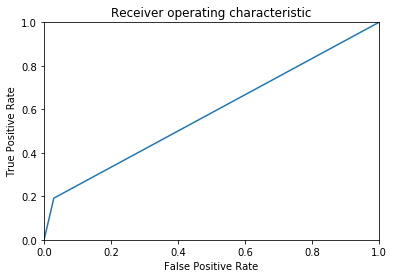

In [42]:
fpr,tpr, _ = roc_curve(y_test,y_predict)
roc_auc = auc(fpr, tpr)

print('Area Under the curve',roc_auc)
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

In [43]:
roc_auc

0.5811815740549473

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [45]:
# Number of iterations for bootstrapping
bootstrap_iteration = range(10)
accuracy = []


In [46]:
from sklearn.ensemble import BaggingClassifier


In [47]:
bgcl = BaggingClassifier(base_estimator=rfc,n_estimators=51,bootstrap=True)
for i in bootstrap_iteration:
    bgcl.fit(X_train, y_train)
    y_predict=bgcl.predict(X_test)
    acc=metrics.accuracy_score(y_test,y_predict)
    accuracy.append(acc*100)


BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=51, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [59]:
# Average of models
print (sum(accuracy)/len(accuracy))

72.53333333333333
